In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [32]:
stock_AAPL_df = pd.read_csv('./data/AAPL.csv')

In [33]:
stock_AAPL_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0


In [34]:
stock_AAPL_df[['year', 'month', 'day']] = stock_AAPL_df['date'].str.split('-', expand=True)
stock_AAPL_df['day'] = stock_AAPL_df['day'].str.split(' ', expand=True)[0]

In [35]:
train_stock_df = stock_AAPL_df[stock_AAPL_df['year'] != '2024']
train_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.340,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0,2019,04,08
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.230,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0,2019,04,09
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.180,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0,2019,04,10
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.440,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0,2019,04,11
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.210,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0,2019,04,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,AAPL,2023-12-22 00:00:00+00:00,193.60,195.41,192.970,195.18,37149570,193.354276,195.161978,192.725075,194.932270,37149570,0.0,1.0,2023,12,22
1188,AAPL,2023-12-26 00:00:00+00:00,193.05,193.89,192.830,193.61,28919310,192.804974,193.643908,192.585253,193.364263,28919310,0.0,1.0,2023,12,26
1189,AAPL,2023-12-27 00:00:00+00:00,193.15,193.50,191.090,192.49,47899806,192.904847,193.254403,190.847462,192.245685,47899806,0.0,1.0,2023,12,27
1190,AAPL,2023-12-28 00:00:00+00:00,193.58,194.66,193.170,194.14,34049898,193.334301,194.412930,192.924822,193.893590,34049898,0.0,1.0,2023,12,28


In [36]:
test_stock_df =  stock_AAPL_df[stock_AAPL_df['year'] == '2024']
test_stock_df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,year,month,day
1192,AAPL,2024-01-02 00:00:00+00:00,185.64,188.4400,183.8850,187.150,82488674,185.404379,188.200825,183.651606,186.912462,82488674,0.0,1.0,2024,01,02
1193,AAPL,2024-01-03 00:00:00+00:00,184.25,185.8800,183.4300,184.220,58414460,184.016143,185.644074,183.197184,183.986181,58414460,0.0,1.0,2024,01,03
1194,AAPL,2024-01-04 00:00:00+00:00,181.91,183.0872,180.8800,182.150,71983570,181.679113,182.854819,180.650420,181.918809,71983570,0.0,1.0,2024,01,04
1195,AAPL,2024-01-05 00:00:00+00:00,181.18,182.7600,180.1700,181.990,62196924,180.950040,182.528034,179.941322,181.759012,62196924,0.0,1.0,2024,01,05
1196,AAPL,2024-01-08 00:00:00+00:00,185.56,185.6000,181.5000,182.085,59144470,185.324480,185.364430,181.269634,181.853891,59144470,0.0,1.0,2024,01,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2024-04-01 00:00:00+00:00,170.03,171.2500,169.4750,171.190,43772506,170.030000,171.250000,169.475000,171.190000,43772506,0.0,1.0,2024,04,01
1254,AAPL,2024-04-02 00:00:00+00:00,168.84,169.3400,168.2302,169.080,49013991,168.840000,169.340000,168.230200,169.080000,49013991,0.0,1.0,2024,04,02
1255,AAPL,2024-04-03 00:00:00+00:00,169.65,170.6800,168.5800,168.790,45571129,169.650000,170.680000,168.580000,168.790000,45571129,0.0,1.0,2024,04,03
1256,AAPL,2024-04-04 00:00:00+00:00,168.82,171.9200,168.8200,170.290,53355055,168.820000,171.920000,168.820000,170.290000,53355055,0.0,1.0,2024,04,04


In [37]:
train_data = train_stock_df[['date', 'open']]
train_data['date'] = pd.to_datetime(train_data['date'])
train_data

/tmp/ipykernel_8553/1735575949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


,date,open
0,2019-04-08 00:00:00+00:00,196.42
1,2019-04-09 00:00:00+00:00,200.32
2,2019-04-10 00:00:00+00:00,198.68
3,2019-04-11 00:00:00+00:00,200.85
4,2019-04-12 00:00:00+00:00,199.20
...,...,...
1187,2023-12-22 00:00:00+00:00,195.18
1188,2023-12-26 00:00:00+00:00,193.61
1189,2023-12-27 00:00:00+00:00,192.49
1190,2023-12-28 00:00:00+00:00,194.14


## Data Pre-Processing

In [38]:
training_array = train_data['open'].values
training_array = training_array.reshape((-1, 1))
training_array.shape

(1192, 1)

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

training_array_scaled = scaler.fit_transform(training_array)

training_array_scaled.shape

(1192, 1)

In [40]:
X_train = []
y_train = []

time_step = 25

for i in range(time_step, len(training_array)):
    X_train.append(training_array_scaled[i-time_step:i].flatten())
    y_train.append(training_array_scaled[i][0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

## Visualise

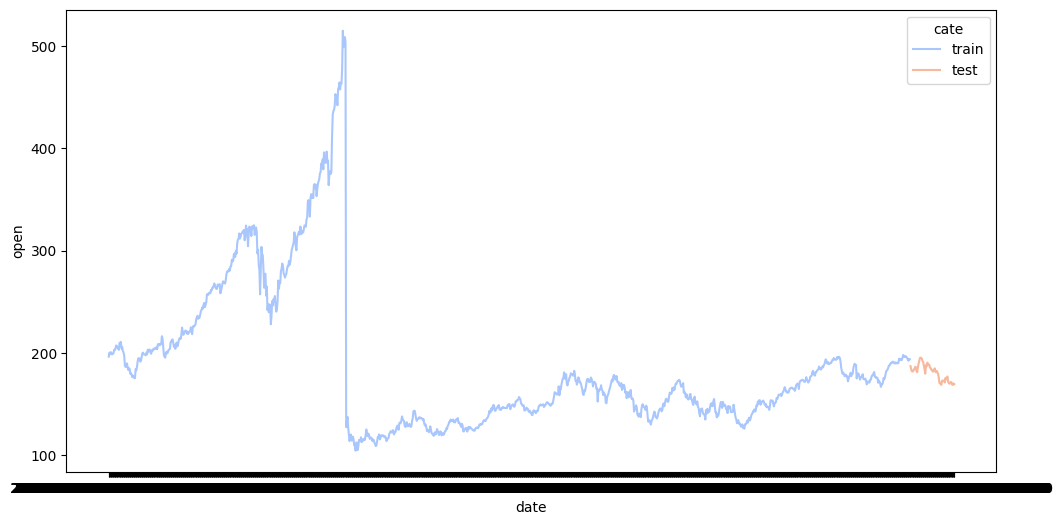

In [41]:
total_df = pd.DataFrame(train_stock_df[['open', 'date']], columns=['open', 'cate', 'date']).replace(np.nan, 'train')
total_df = pd.concat([total_df, test_stock_df[['open', 'date']]]).replace(np.nan, 'test')
total_df

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_df, x='date', y='open', palette='coolwarm', hue='cate')
plt.show()

<Axes: xlabel='date', ylabel='open'>

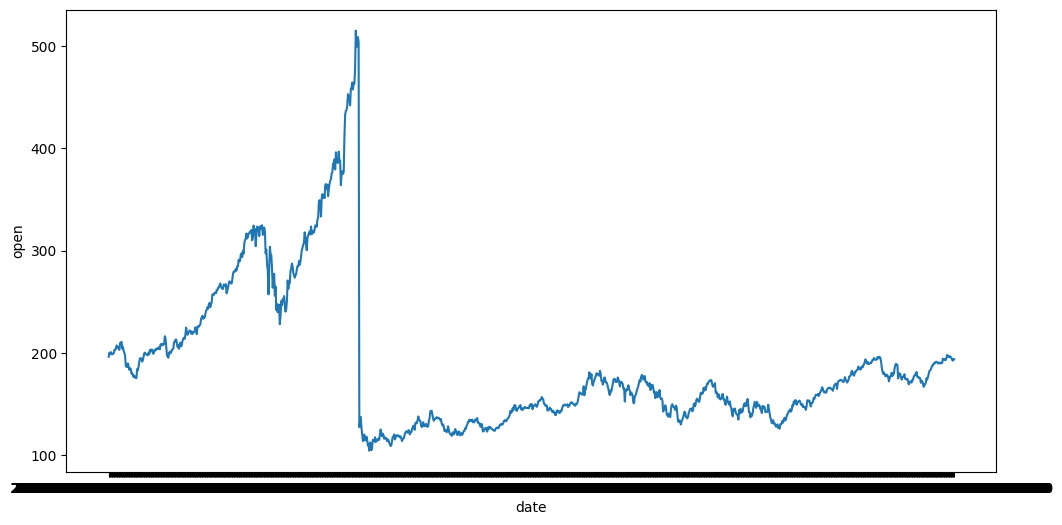

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_stock_df, x='date', y='open')

<Axes: xlabel='date', ylabel='open'>

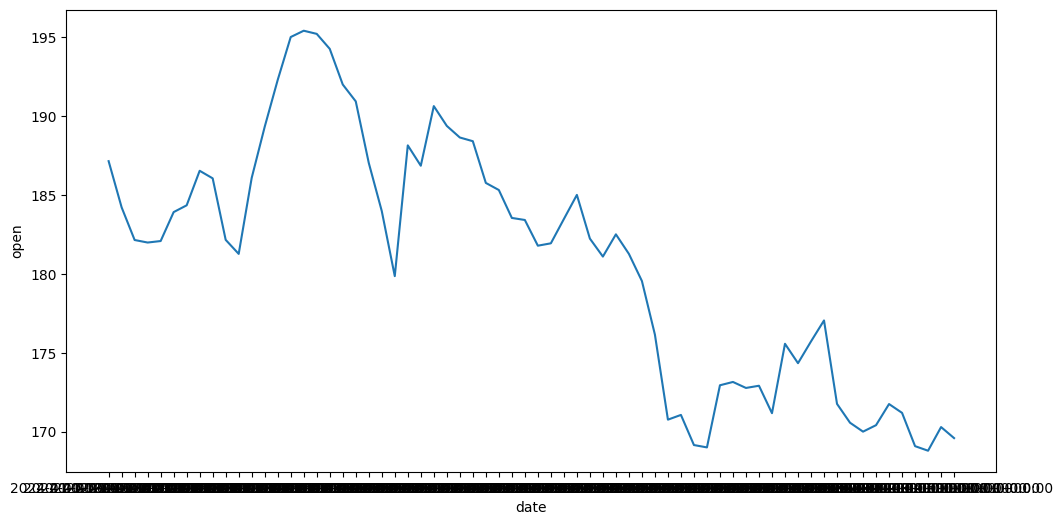

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_stock_df, x='date', y='open')

## LSTM Model

In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
X_train.shape, y_train.shape

((1167, 25, 1), (1167, 1))

In [45]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
lstm_model.add(tf.keras.layers.Dense(units=32))
lstm_model.add(tf.keras.layers.Dense(units=1))

In [46]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [47]:
lstm_model.fit(X_train, y_train, epochs=25, batch_size=16)

Epoch 1/25
73/73 [==============================] - 2s 4ms/step - loss: 0.0085 - root_mean_squared_error: 0.0924
Epoch 2/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 3/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513
Epoch 4/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491
Epoch 5/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439
Epoch 6/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434
Epoch 7/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411
Epoch 8/25
73/73 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417
Epoch 9/25
73/73 [==============================] - 0s 3ms/step - loss: 0.0014 - root_mean_squar

## Final Result

In [48]:
y_pred = lstm_model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred

37/37 [==============================] - 0s 2ms/step


array([[190.97   ],
       [186.60298],
       [184.93697],
       ...,
       [192.91261],
       [191.62524],
       [191.98547]], dtype=float32)

In [49]:
y_test = scaler.inverse_transform(y_train)
y_test.shape
y_test

array([[186.41],
       [186.27],
       [189.91],
       ...,
       [192.49],
       [194.14],
       [193.9 ]])

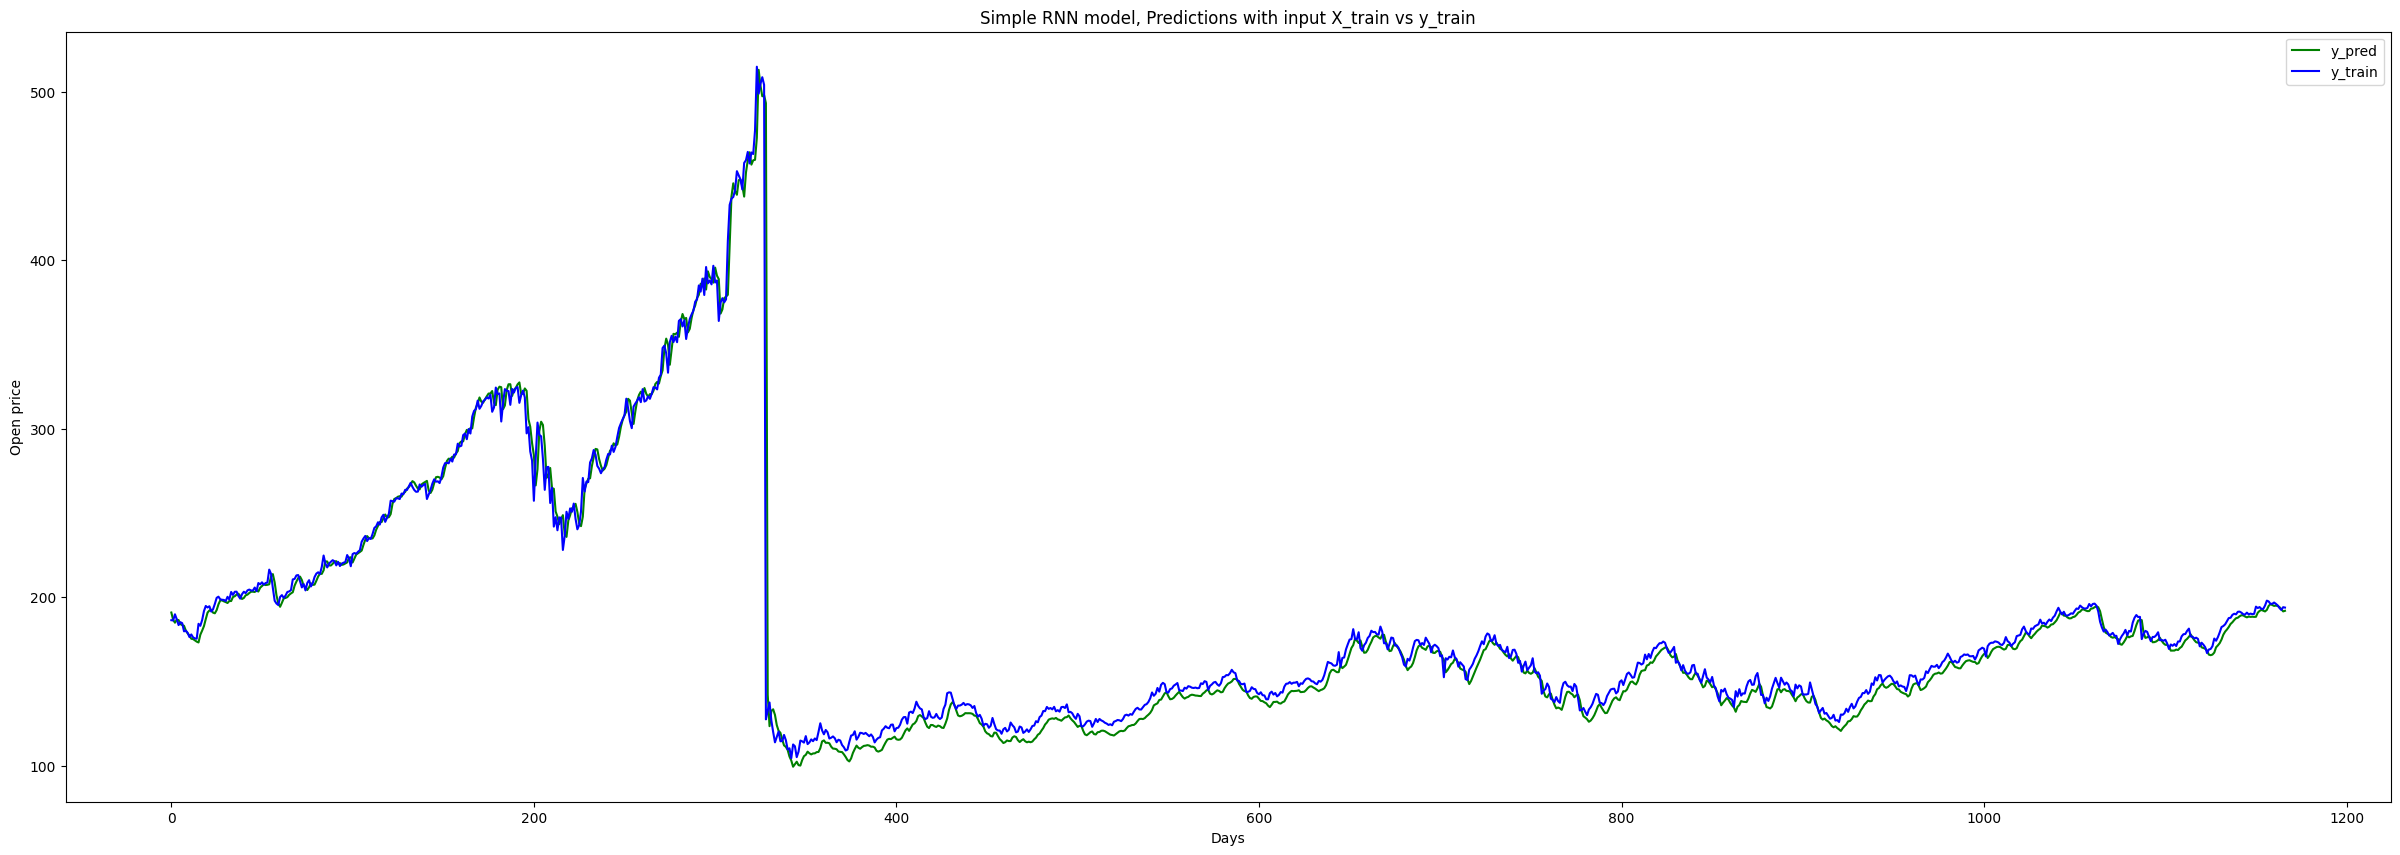

In [50]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "g", label = "y_pred" )
plt.plot(y_test, color = "blue", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


In [51]:
test_data = test_stock_df[['date', 'open']]
test_data['date'] = pd.to_datetime(test_data['date'])
test_data

/tmp/ipykernel_8553/3179668811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'])


,date,open
1192,2024-01-02 00:00:00+00:00,187.150
1193,2024-01-03 00:00:00+00:00,184.220
1194,2024-01-04 00:00:00+00:00,182.150
1195,2024-01-05 00:00:00+00:00,181.990
1196,2024-01-08 00:00:00+00:00,182.085
...,...,...
1253,2024-04-01 00:00:00+00:00,171.190
1254,2024-04-02 00:00:00+00:00,169.080
1255,2024-04-03 00:00:00+00:00,168.790
1256,2024-04-04 00:00:00+00:00,170.290


In [52]:
testing_array = test_data['open'].values
testing_array = testing_array.reshape((-1, 1))
testing_array.shape

(66, 1)

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))

testing_array_scaled = scaler.fit_transform(testing_array)

testing_array_scaled.shape

(66, 1)

In [54]:
X_test = []
y_test = []

time_step = 25

for i in range(time_step, len(testing_array)):
    X_test.append(testing_array_scaled[i-time_step:i].flatten())
    y_test.append(testing_array_scaled[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [55]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (41, 25)
Shape of y_test before reshape : (41, 1)


In [56]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

In [57]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (41, 25, 1)
Shape of y_test before reshape : (41, 1)


In [58]:
y_pred_test = lstm_model.predict(X_test)
y_pred_test=scaler.inverse_transform(y_pred_test)
print("Shape of y_pred_of_test :",y_pred_test.shape)

2/2 [==============================] - 0s 3ms/step
Shape of y_pred_of_test : (41, 1)


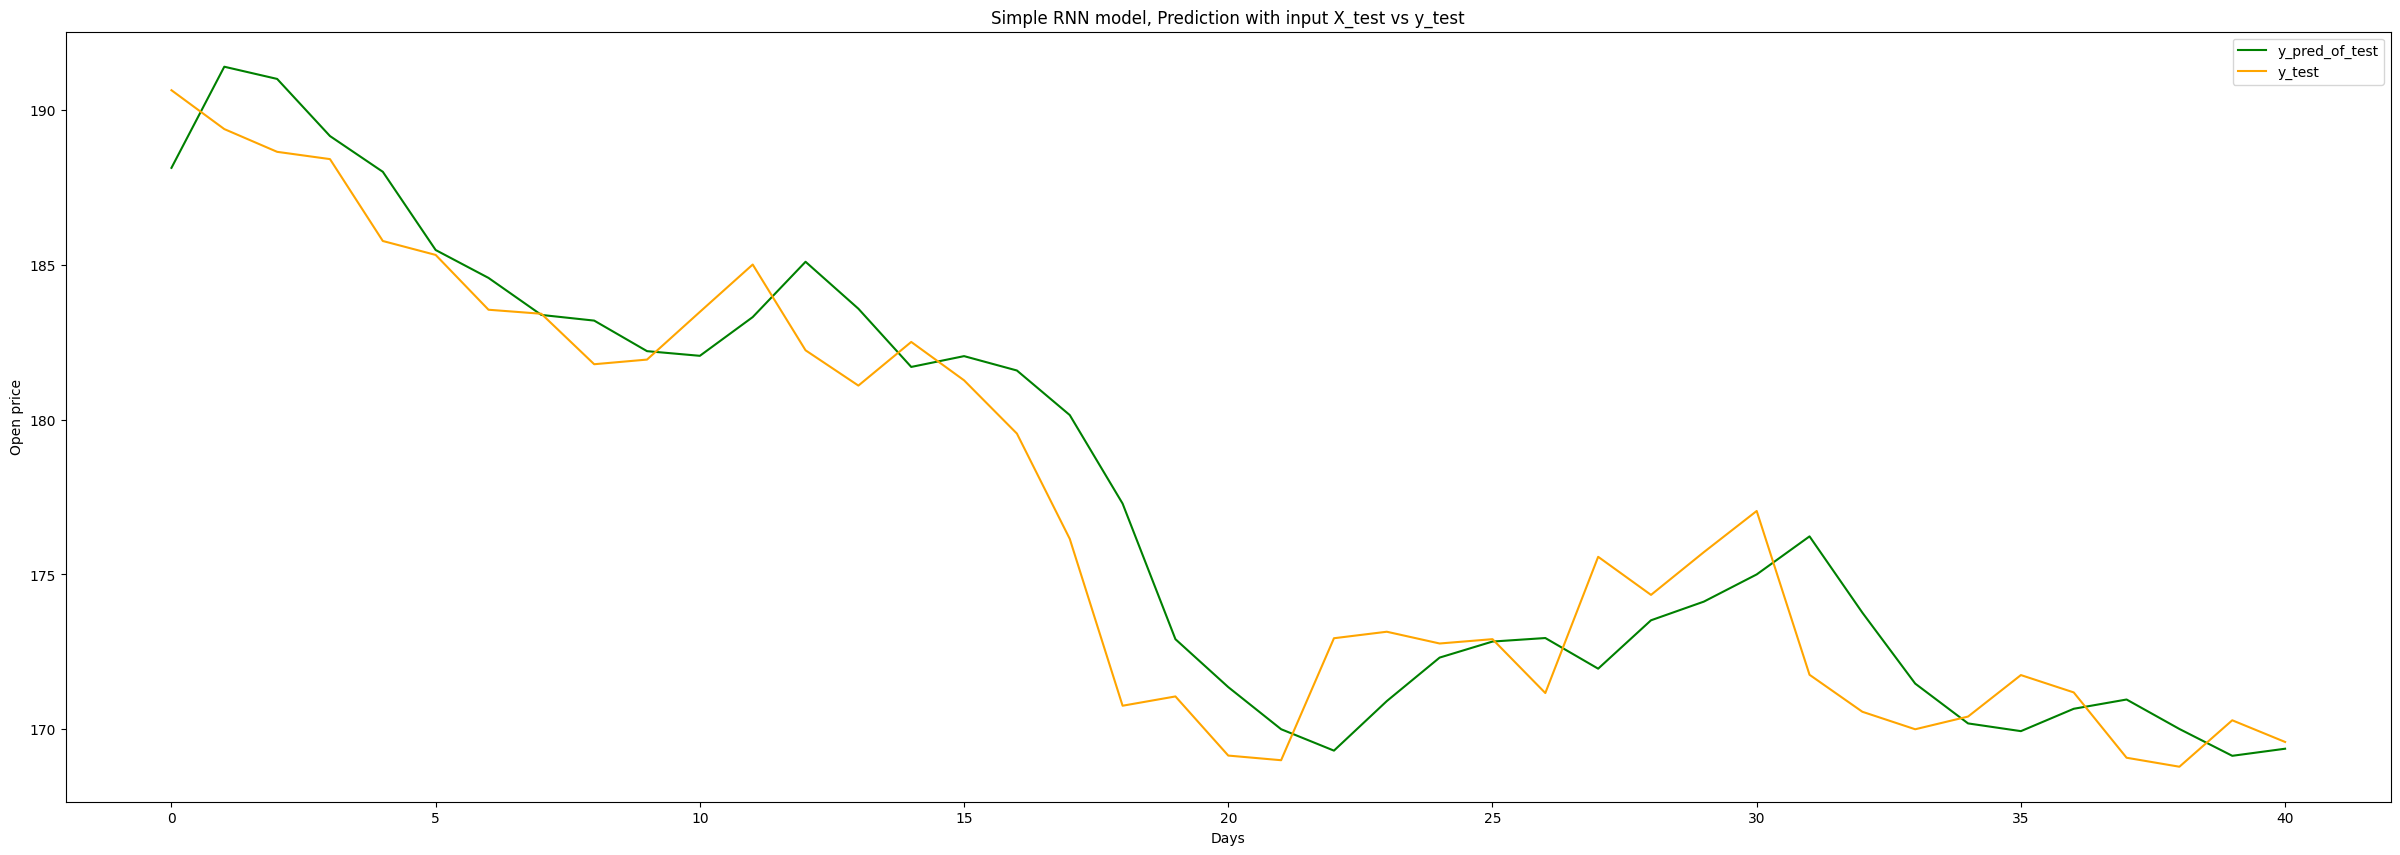

In [59]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_test, label = "y_pred_of_test", c = "g")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()